In [ ]:
# In this code we extract all 40 bonds prices of ED futres given in the dataset for making yiled curve at 2 particular dates
# by changing dates to other working day dates, we can get 2 diff yeild curves at different dates

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Read the Excel file
data = pd.read_excel('/content/ED Market Data.xlsx')
data

,EDH00 Comdty,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,EDM00 Comdty,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 542,Unnamed: 543,Unnamed: 544,Unnamed: 545,EDZ22 Comdty,Unnamed: 547,Unnamed: 548,Unnamed: 549,Unnamed: 550,Unnamed: 551
0,Date,Last Price,Net Change,Open,High,Low,Date,Last Price,Net Change,Open,...,Net Change,Open,High,Low,Date,Last Price,Net Change,Open,High,Low
1,NaN,93.78,-0.055,93.8,93.83,93.765,NaN,93.445,-0.08,93.485,...,NaN,NaN,NaN,NaN,NaN,96.46,NaN,NaN,NaN,NaN
2,2000-01-04 00:00:00,93.795,0.015,93.78,93.81,93.75,2000-01-04 00:00:00,93.495,0.05,93.43,...,0.07,NaN,96.41,NaN,2012-12-18 00:00:00,96.38,-0.08,NaN,NaN,96.38
3,2000-01-05 00:00:00,93.79,-0.005,93.795,93.815,93.77,2000-01-05 00:00:00,93.45,-0.045,93.51,...,0.055,NaN,96.49,NaN,2012-12-19 00:00:00,96.42,0.04,NaN,96.4,NaN
4,2000-01-06 00:00:00,93.79,0,93.79,93.805,93.785,2000-01-06 00:00:00,93.47,0.02,93.485,...,0.07,NaN,96.565,NaN,2012-12-20 00:00:00,96.43,0.01,NaN,96.42,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2022-12-19 00:00:00,95.2617,0.0042,95.2525,95.2625,95.2525
2524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-20-bbee5b86ff3b>:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if row1:
<ipython-input-20-bbee5b86ff3b>:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if row2:


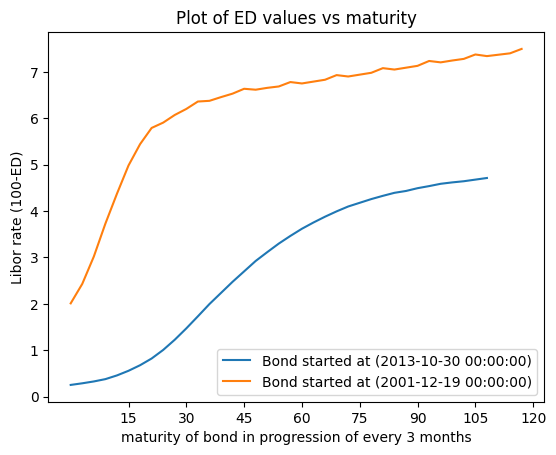

40


In [20]:
#select both dates which are the working days in US market
date1= pd.to_datetime('2013-10-30')
date2=pd.to_datetime('2001-12-19')
prices1=[]
prices2=[]
for i in range (0,data.shape[1],6):
  row1=data[data.iloc[:,i]==date1].index.values
  if row1:
   prices1.append(100-data.iloc[row1,i+1])
  row2=data[data.iloc[:,i]==date2].index.values
  if row2:
    prices2.append(100-data.iloc[row2,i+1])
# Create figure and axes
fig, ax = plt.subplots()

# Set x-axis interval to 3 points
#ax.set_xticks(np.arange(3,40))
#ax.set_xticklabels(np.arange(3,121,3))
# Plot the data
ax.plot(prices1, label='Bond started at ({})'.format(date1))
ax.plot(prices2, label='Bond started at ({})'.format(date2))
plt.xticks(ticks=plt.xticks()[0][2:-1], labels=3 * np.array(plt.xticks()[0][2:-1], dtype=np.int64))

# Add legend
ax.legend()

# Set labels and title
ax.set_xlabel('maturity of bond in progression of every 3 months')
ax.set_ylabel('Libor rate (100-ED)')
ax.set_title('Plot of ED values vs maturity')

# Display the plot
plt.show()